Nama : Muhammad Rayyan Aqiilah Manna

NIM : 1103210210

Tugas : Tugas Week 2 Polynomial Regression

Dataset : GDP.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/42247078-03bd-4e3e-8f8d-3df08c71f91b

#1. IMPORT LIBRARY

Prompt ChatGPT : menggunakan dataset yang saya berikan, bagaimana cara untuk membuat model polynomial regression ?

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


#2. MOUNT DRIVE

Mount drive untuk memuat isi GDP.csv menggunakan format tugas yang sudah dibuat sebelumnya

In [18]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/GDP.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. MENAMPILKAN DATA

Bertujuan untuk mengecek jika data yang dimuat sudah benar atau belum

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10134 entries, 0 to 10133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10134 non-null  int64  
 1   rank         10134 non-null  int64  
 2   country      10134 non-null  object 
 3   state        10134 non-null  object 
 4   gdp          10134 non-null  int64  
 5   gdp_percent  10134 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 475.2+ KB
None


In [19]:
print(df.head())

   year  rank            country    state           gdp  gdp_percent
0  1960     1  the United States  America  543300000000     0.468483
1  1960     2     United Kingdom   Europe   73233967692     0.063149
2  1960     3             France   Europe   62225478000     0.053656
3  1960     4              China     Asia   59716467625     0.051493
4  1960     5              Japan     Asia   44307342950     0.038206


In [23]:
print(df.describe())

               year          rank           gdp   gdp_percent
count  10134.000000  10134.000000  1.013400e+04  1.013400e+04
mean    1993.579238     87.353069  1.773584e+11  6.019341e-03
std       16.841720     53.688994  9.522888e+11  2.748022e-02
min     1960.000000      1.000000  8.824447e+06  3.550683e-07
25%     1980.000000     42.000000  1.380725e+09  8.875239e-05
50%     1995.000000     84.000000  7.559957e+09  3.650213e-04
75%     2008.000000    128.000000  4.995662e+10  2.499742e-03
max     2020.000000    206.000000  2.143322e+13  4.684827e-01


#4. PRE-PROCESSING DATA

Pembuatan model polinomial menggunakan code yang sudah diminta saat di awal

In [20]:
X = df[['year']]  # Hanya menggunakan fitur 'Year' untuk contoh ini
y = df['gdp']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek PolynomialFeatures untuk membuat fitur-fitur polinomial
poly = PolynomialFeatures(degree=3)  # Contoh: menggunakan derajat polinomial 3

# Transformasi fitur X menjadi fitur-fitur polinomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model pada data latih yang telah ditransformasi
model.fit(X_train_poly, y_train)

# Memprediksi nilai GDP_Per_Capita pada data uji yang telah ditransformasi
y_pred = model.predict(X_test_poly)

Root Mean Squared Error (RMSE): 1144763024847.3633
Mean Absolute Error (MAE): 272838917389.786
Mean Absolute Percentage Error (MAPE): 14631.189629781955
Coefficient of Determination (R^2): 0.01707911614981794


#5. EVALUASI MODEL

Prompt ChatGPT : Berikan kode untuk melakukan evaluasi dengan menggunakan RMSE, MAE, MAPPE, R2

In [ ]:
# Evaluasi model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Coefficient of Determination (R^2):", r_squared)

#6. VISUALISASI MODEL

Prompt ChatGPT : berikan kode untuk memvisualisasikan scatter plot dari hasil model polinomial regression diatas

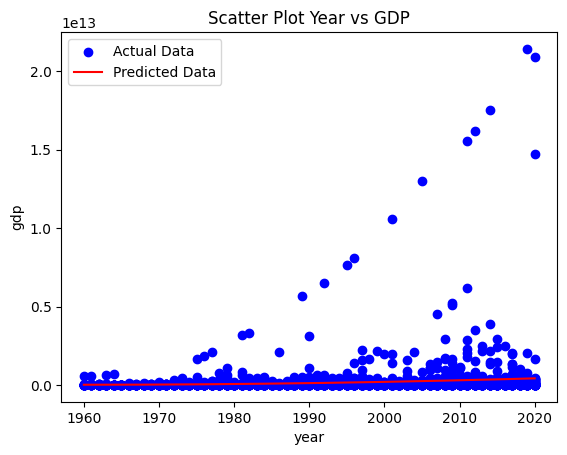

In [27]:
# Mengurutkan data uji berdasarkan Year untuk plot yang lebih rapi
sort_indices = np.argsort(X_test.values.flatten())
X_test_sorted = X_test.values[sort_indices]
y_test_sorted = y_test.values[sort_indices]

# Mengurutkan hasil prediksi sesuai dengan urutan data uji yang diurutkan
y_pred_sorted = y_pred[sort_indices]

# Membuat scatter plot dari data uji
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Menambahkan plot dari hasil prediksi
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Predicted Data')

plt.title('Scatter Plot Year vs GDP')
plt.xlabel('year')
plt.ylabel('gdp')
plt.legend()
plt.show()

Perbandingan antara nilai aktual dengan hasil prediksi yang dibuat oleh model regresi polinomial

In [24]:
actual_vs_predicted = np.column_stack((y_test, y_pred))
print("Actual vs Predicted : ")
print(actual_vs_predicted)

Actual vs Predicted : 
[[4.65800000e+09 2.74280228e+11]
 [2.46823428e+08 1.21577161e+11]
 [3.14933200e+10 1.59921249e+11]
 ...
 [2.06950601e+11 3.80162453e+11]
 [7.35315506e+10 8.88362817e+10]
 [8.77511627e+09 1.01254602e+11]]


Menambahkan data baru lalu meminta model untuk melakukan prediksi

In [26]:
# Misalkan kita memiliki data baru untuk tahun 2027
new_data = pd.DataFrame({'year': [2027]})

# Lakukan transformasi polinomial sesuai dengan pola yang sama dengan saat melatih model
new_data_poly = poly.transform(new_data)

# Lakukan prediksi dengan model yang telah dilatih
predicted_gdp = model.predict(new_data_poly)

# Tampilkan hasil prediksi
print("Prediksi GDP per Kapita untuk tahun 2027:", predicted_gdp)

Prediksi GDP per Kapita untuk tahun 2025: [5.17335934e+11]
